# Author Info
Name: **Ejaz-ur-Rehman**\
Business Unit Head | Data Analyst\
MBA (Accounting & Finance), MS (Finance)\
Crystal Tech (Project of MUZHAB Group)\
Karachi, Pakistan

![Date](https://img.shields.io/badge/Date-23--Aug--2025-green?logo=google-calendar)
[![Email](https://img.shields.io/badge/Email-ijazfinance%40gmail.com-blue?logo=gmail)](mailto:ijazfinance@gmail.com)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Ejaz--ur--Rehman-blue?logo=linkedin)](https://www.linkedin.com/in/ejaz-ur-rehman/)
[![GitHub](https://img.shields.io/badge/GitHub-ejazurrehman-black?logo=github)](https://github.com/ejazurrehman)



## What is Feature Scaling?

Feature scaling is a data preprocessing technique used to bring all independent variables (features) into the same range, so that no single feature dominates the model due to its scale.

Many machine learning algorithms (like KNN, SVM, Logistic Regression, Neural Networks, Gradient Descent) perform better when features are scaled because they rely on distance calculations or optimization convergence.

## Why do we need Feature Scaling?

Example:
- Feature 1: Age → range [0–100]
- Feature 2: Salary → range [20,000–200,000]

Without scaling, the model might think Salary is more important just because of its larger values, even though both features may contribute equally.

In [16]:
# stop future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Common Methods of Feature Scaling

### 1. Min-Max Normalization (Rescaling)
- Brings values into a fixed range (usually [0, 1]).

Formula:

- Xscaled​= Xmax​−Xmin / ​X−Xmin​

In [17]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

data = {'Age': [18, 25, 40, 60], 'Salary': [20000, 50000, 100000, 150000]}
df = pd.DataFrame(data)
df.head()

,Age,Salary
0,18,20000
1,25,50000
2,40,100000
3,60,150000


In [18]:
scaler = MinMaxScaler()
df['Scaled_Age'] = scaler.fit_transform(df[['Age']])
df['Scaled_Salary'] = scaler.fit_transform(df[['Salary']])


print(df.head())

   Age  Salary  Scaled_Age  Scaled_Salary
0   18   20000    0.000000       0.000000
1   25   50000    0.166667       0.230769
2   40  100000    0.523810       0.615385
3   60  150000    1.000000       1.000000


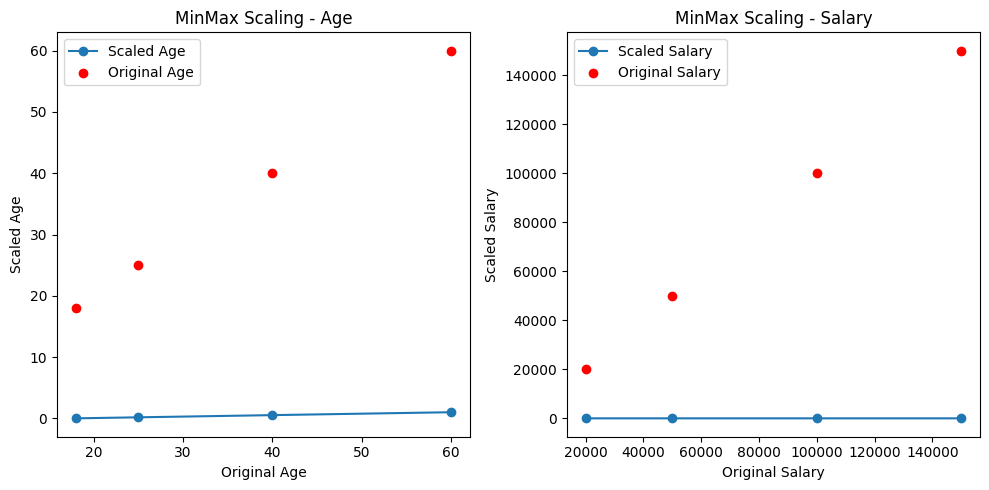

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data
data = {
    "Age": [18, 25, 40, 60],
    "Salary": [20000, 50000, 100000, 150000],
    "Scaled_Age": [0.000000, 0.166667, 0.523810, 1.000000],
    "Scaled_Salary": [0.000000, 0.230769, 0.615385, 1.000000]
}

df = pd.DataFrame(data)

# Plot original vs scaled
plt.figure(figsize=(10,5))

# Age comparison
plt.subplot(1,2,1)
plt.plot(df["Age"], df["Scaled_Age"], marker='o', label="Scaled Age")
plt.scatter(df["Age"], df["Age"], color="red", label="Original Age")
plt.title("MinMax Scaling - Age")
plt.xlabel("Original Age")
plt.ylabel("Scaled Age")
plt.legend()

# Salary comparison
plt.subplot(1,2,2)
plt.plot(df["Salary"], df["Scaled_Salary"], marker='o', label="Scaled Salary")
plt.scatter(df["Salary"], df["Salary"], color="red", label="Original Salary")
plt.title("MinMax Scaling - Salary")
plt.xlabel("Original Salary")
plt.ylabel("Scaled Salary")
plt.legend()

plt.tight_layout()
plt.show()


### Key Interpretation for Min-Max Scaling Results
- Normalization Applied (Min–Max Scaling)
- Each feature (Age, Salary) has been rescaled between 0 and 1.
- The smallest value in each column → 0.
- The largest value in each column → 1.
- All other values are relative positions between min and max.

#### Age Interpretation
- 18 years → 0.0 (youngest, baseline).
- 25 years → 0.167 → closer to the lower bound (about 17% of the way between 18 and 60).
- 40 years → 0.524 → roughly halfway (52% of the way between 18 and 60).
- 60 years → 1.0 (oldest, upper bound).

#### Salary Interpretation
- 20,000 → 0.0 (lowest salary in this dataset).
- 50,000 → 0.231 → about 23% of the way between 20k and 150k.
- 100,000 → 0.615 → about 62% of the way between 20k and 150k.
- 150,000 → 1.0 (highest salary).

### Big Picture Meaning
- Now Age and Salary are comparable on the same scale (0–1).
- Instead of dealing with raw values like "Age = 60, Salary = 150000", both become 1.0.
- This prevents algorithms from being biased toward Salary just because it had larger numbers than Age.

#### Final Insight
- The dataset now expresses relative positions:
  - A 40-year-old with 100,000 salary is mid-range (≈0.5–0.6).
  - A 25-year-old with 50,000 salary is closer to the lower bound (≈0.2).
  - The scaled values don’t carry units anymore, just relative magnitude between 0 and 1.

### 2. Standardization (Z-score Normalization)
- Converts data to have mean = 0 and standard deviation = 1.

Formula:

- Xscaled ​= X−μ / σ

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Scaled_Age'] = scaler.fit_transform(df[['Age']])
df['Scaled_Salary'] = scaler.fit_transform(df[['Salary']])

print(df.head())


   Age  Salary  Scaled_Age  Scaled_Salary
0   18   20000   -1.102532      -1.212183
1   25   50000   -0.667731      -0.606092
2   40  100000    0.263987       0.404061
3   60  150000    1.506277       1.414214


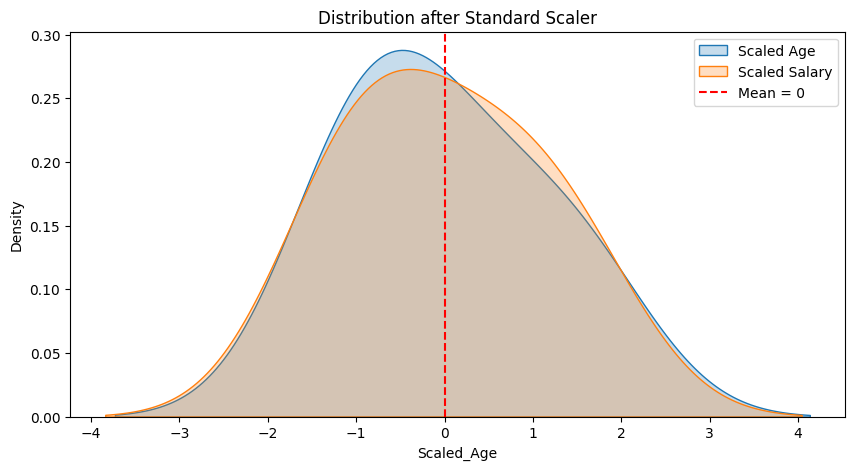

In [21]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.kdeplot(df["Scaled_Age"], label="Scaled Age", shade=True)
sns.kdeplot(df["Scaled_Salary"], label="Scaled Salary", shade=True)
plt.axvline(0, color='red', linestyle='--', label="Mean = 0")
plt.title("Distribution after Standard Scaler")
plt.legend()
plt.show()


### Interpretation of Scaled Values

1. Negative values → below the mean.
2. Positive values → above the mean.
3. Magnitude (absolute value) → how many standard deviations away from the mean.

### Age Interpretation
- 18 years → -1.10 → about 1.1 standard deviations below average age.
- 25 years → -0.67 → below average, but closer to the mean.
- 40 years → 0.26 → slightly above the mean age.
- 60 years → 1.51 → 1.5 standard deviations above average age.

#### Salary Interpretation
- 20,000 → -1.21 → about 1.2 standard deviations below average salary.
- 50,000 → -0.61 → below average, but closer to mean.
- 100,000 → 0.40 → slightly above mean salary.
- 150,000 → 1.41 → 1.4 standard deviations above mean salary.

#### Big Picture Meaning

- After standardization, both features (Age and Salary) are centered around 0 with a comparable spread (std = 1).

This ensures:
  - The youngest/lowest salary → strongly negative values.
  - The oldest/highest salary → strongly positive values.
  - Mid-range values hover around 0, representing “average.”

### 3. Robust Scaling
- Uses median and interquartile range (IQR).
- Less sensitive to outliers.

Formula:

- Xscaled​= X−median / IQR

In [22]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df['Scaled_Age'] = scaler.fit_transform(df[['Age']])
df['Scaled_Salary'] = scaler.fit_transform(df[['Salary']])

print(df.head())


   Age  Salary  Scaled_Age  Scaled_Salary
0   18   20000   -0.666667      -0.785714
1   25   50000   -0.344828      -0.357143
2   40  100000    0.344828       0.357143
3   60  150000    1.264368       1.071429


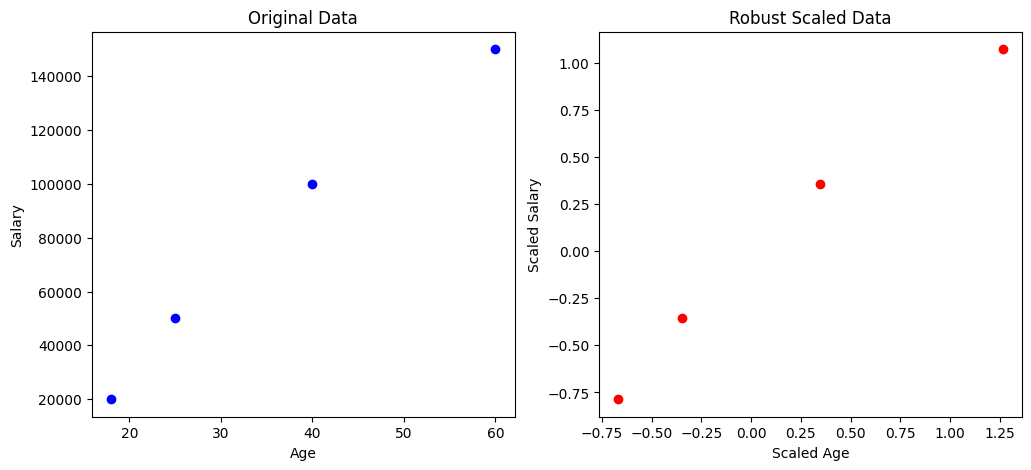

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Example Data
data = {
    'Age': [18, 25, 40, 60],
    'Salary': [20000, 50000, 100000, 150000],
    'Scaled_Age': [-0.666667, -0.344828, 0.344828, 1.264368],
    'Scaled_Salary': [-0.785714, -0.357143, 0.357143, 1.071429]
}

df = pd.DataFrame(data)

# Plot side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original Data
axes[0].scatter(df['Age'], df['Salary'], color="blue")
axes[0].set_title("Original Data")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Salary")

# Scaled Data
axes[1].scatter(df['Scaled_Age'], df['Scaled_Salary'], color="red")
axes[1].set_title("Robust Scaled Data")
axes[1].set_xlabel("Scaled Age")
axes[1].set_ylabel("Scaled Salary")

plt.show()


### Interpretation Robust Scaler Results
- In simple words:
  - 0 means median value.
  - Negative values = below median (measured in IQRs).
  - Positive values = above median (measured in IQRs).
  - RobustScaler is useful here because if our dataset had very high outlier salaries, our scaled values would still stay stable and meaningful.
1. Values are relative to the median (50th percentile)
- Both Age and Salary are centered around their median.
- Negative values (e.g., -0.666667 for Age 18) mean these are below the median.
- Positive values (e.g., 1.264368 for Age 60) mean these are above the median.
1. Scaling reflects distance in terms of IQR
- For Age = 18 → -0.666667 means it’s ~0.67 IQRs below the median age.
- For Age = 60 → 1.264368 means it’s ~1.26 IQRs above the median age.
- Similarly, Salary = 20,000 (-0.785714) is ~0.79 IQRs below the median salary.
1. Middle values are close to 0
- Age = 40 → 0.344828 (slightly above median).
- Salary = 100,000 → 0.357143 (slightly above median).
- This shows they are near the dataset’s center.
1. Robust to outliers
- If our dataset had extreme salaries (say 1,000,000), MinMaxScaler or StandardScaler would stretch the values, making our scaled data distorted.
- But with RobustScaler, the scaling wouldn’t change drastically, because it depends on median and IQR, not min/max or mean.

### 4. Logarithmic Scaling

Logarithmic scaling (or log transformation) is a method where we apply a log function (log base 10, natural log ln, or log base 2) to data values to compress large values and expand small values.

It’s especially useful when the data is highly skewed or spans several orders of magnitude.

### Why Use Logarithmic Scaling?

Handle Skewed Data:
  - Many real-world datasets (income, population, sales) are right-skewed.
  - Log scaling reduces skewness, making distributions closer to normal.

Reduce Outlier Impact:
  - Large values are compressed, so they don’t dominate the model.
  - Better Visualization:

In plots, exponential or heavy-tailed data looks more interpretable after log scaling.

Formula

If 𝑋 is the original value:

X′=log(X+1)
- +1 is often added to avoid taking log of 0.
- You can use log base 10, log base 2, or natural log (ln) depending on context.

    Income  Log_Income
0     1000    6.908755
1     5000    8.517393
2    20000    9.903538
3   100000   11.512935
4  1000000   13.815512


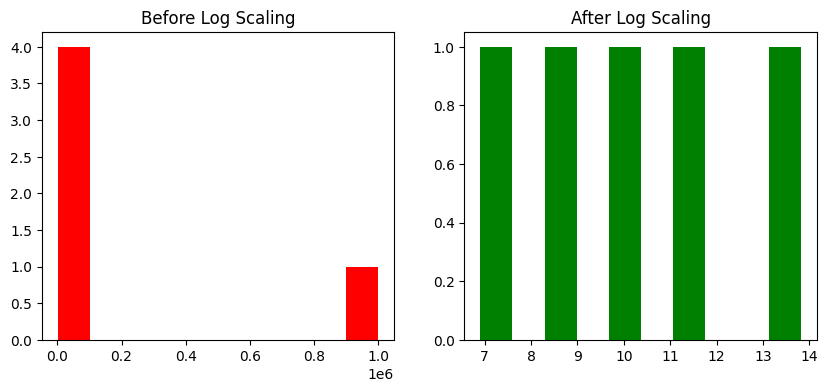

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample skewed data
data = {'Income': [1000, 5000, 20000, 100000, 1000000]}
df = pd.DataFrame(data)

# Apply log scaling
df['Log_Income'] = np.log1p(df['Income'])  # log(x+1)

print(df)

# Plot before vs after
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df['Income'], bins=10, color='red')
plt.title("Before Log Scaling")

plt.subplot(1,2,2)
plt.hist(df['Log_Income'], bins=10, color='green')
plt.title("After Log Scaling")

plt.show()


### Interpretation of Log Scaling Results
1. Compression of Large Values
- Original incomes range from 1,000 to 1,000,000 (a 1000x difference).
- After log scaling, values range from 6.9 to 13.8 (only ~2x difference).
- This shows how log transformation compresses extreme differences and makes data more manageable.
2. Reduced Skewness
- Income data is usually right-skewed (a few very high values, many low values).
- Log scaling reduces skewness by bringing large numbers closer to the smaller ones.
- For example:
  - Increase from 1,000 → 5,000 = +4000 (big absolute jump) but only +1.6 on log scale.
  - Increase from 100,000 → 1,000,000 = +900,000 (huge absolute jump) but only +2.3 on log scale.
- This shows that log scaling emphasizes relative differences rather than absolute ones.
3. Interpretation in Models
- Each unit increase in Log_Income represents a multiplicative change in income, not additive.
- Example:
  - Log_Income ≈ 6.9 → Income ≈ 1,000
  - Log_Income ≈ 11.5 → Income ≈ 100,000
- So if we model Log_Income, we’re essentially analyzing percentage changes in income instead of raw differences.

#### In summary:
Log scaling transforms wide-ranging, skewed income data into a more compact, interpretable scale. It highlights proportional changes (growth rates) rather than raw absolute changes, making the data easier to analyze and suitable for models like regression.


## When to Use What
- Min-Max Scaling → Best for algorithms needing bounded features (e.g., Neural Networks, KNN).
- Standardization → Good for algorithms assuming normal distribution (e.g., SVM, Logistic Regression, PCA).
- Robust Scaling → Good when dataset contains outliers.

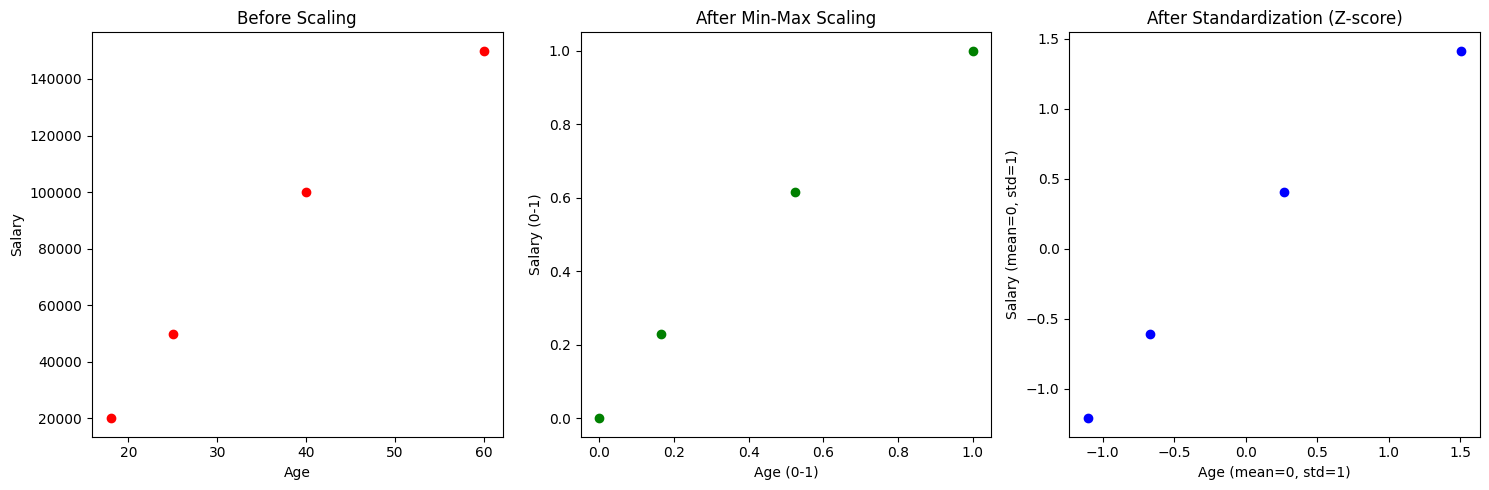

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample dataset
data = {
    "Age": [18, 25, 40, 60],
    "Salary": [20000, 50000, 100000, 150000]
}
df = pd.DataFrame(data)

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)

# Apply Standardization
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Data
axes[0].scatter(df["Age"], df["Salary"], color="red")
axes[0].set_title("Before Scaling")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Salary")

# Min-Max Scaling
axes[1].scatter(df_minmax["Age"], df_minmax["Salary"], color="green")
axes[1].set_title("After Min-Max Scaling")
axes[1].set_xlabel("Age (0-1)")
axes[1].set_ylabel("Salary (0-1)")

# Standardization
axes[2].scatter(df_std["Age"], df_std["Salary"], color="blue")
axes[2].set_title("After Standardization (Z-score)")
axes[2].set_xlabel("Age (mean=0, std=1)")
axes[2].set_ylabel("Salary (mean=0, std=1)")

plt.tight_layout()
plt.show()


## What we’ll See:
- Before Scaling: Salary dominates because values are much larger.
- After Min-Max Scaling: Both features are squeezed into [0,1].
- After Standardization: Both features centered around mean 0 with std 1.